In [1]:
from IPython.display import display, HTML

<h2><center>Capstone Project - Air accident data severity project </h2>

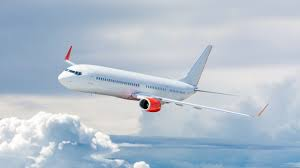

<h3><center> Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Map with accident ratio](#map)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



### Introduction: Business Problem <a name="introduction"></a>

The project will predict  air  accidents' severity based on ICAO data provided for a period of 2008-2020.
Aviation accidents are rare, but when they occur, it can be difficult to determine who is at fault and any probable causes. Several parties, including designated federal agencies, may be part of an aviation accident investigation.
There are more than 100 international and  local organizations are involve in air accident investigation  : ICAO, National Transportation Safety Board (USA), Federal Aviation Administration and etc.  These groups of organizations, aircraft producers can be interested in the  project. 

Based on definition of our problem, factors that will influence our decision are: number of accidents, type of accident, types of aircraft,  number of departure, location of accident, type of engine. 
Based on the data will be created clusters of accident 
Following data sources will be needed to extract/generate the required information:
1)ICAO accident data for period 2008-2020
2)World Bank Data , departure statistics from 2008 
3)World countries map with GEO data
4)aircraft type DB

In this project, I will use SVM (Support Vector Machines) to build and train a model using aircaft accident data, and classify accidents by  fatal or with no fatalities . '0' - no fatalities , '1' - with fatalities. 

For model evaluation will be used a plot with  confusion matrix 

## Data <a name="data"></a>

In [2]:
#import lab-s
import pandas as pd
import numpy as np

pd.set_option("mode.chained_assignment", None)
pd.set_option('display.max_rows', 10)# set max rows to 10

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

from bokeh.io import output_notebook
from bokeh.plotting import Figure,  show
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
import requests

from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

from pandas.io.json import json_normalize

import wget

import  pandas_datareader as web

In [3]:
#import accident ICAO data 
#import wget
#url = 'https://applications.icao.int/dataservices/api/incident?api_key=410342f0-05be-11eb-9a91-77d0881f3991&StateOfOccurrence=All&format=.csv&StateOfOperator=All&StateOfRegistry=All&Year=All'
#df = wget.download(url)
#df = pd.read_json('incident')

In [4]:
df = pd.read_csv(r'C:\Users\IKonnov\Downloads\air.csv')


In [5]:
dec =  pd.read_excel(r'C:\Users\IKonnov\Downloads\zalupa.xlsx')

In [6]:
#create function to show a dataframe in Bokeh
def dfr(df, height, width):
    Columns = [TableColumn(field=Ci, title=Ci) for Ci in df.columns] # bokeh columns
    data_table = DataTable(columns=Columns, source=ColumnDataSource(df), height = height, width = width) # bokeh table
    output_notebook()
    return show(data_table)
    

In [7]:
#function to see columns unique values 
def column_unv (column, frame):
    model = frame[column].value_counts(dropna=False)
    model = model.to_frame()
    model.reset_index ( inplace =True)
    return dfr(model, 200, 400)

### Dataframe with all data imported from ICAO

In [8]:
dfr(df, 300, 1000)

Loading BokehJS ...

In [9]:
dec.rename(columns = {'Type Designator': 'TypeDesignator'}, inplace =True)

### Dataframe with aircraft code and all futures  (type designator - a code for each model of aircraft)

In [10]:
dfr(dec, 300, 600)

Loading BokehJS ...

In [12]:
#drop  NaN values
dec.dropna(inplace =True)

### Data cleansing , replace misprints in ICO data 

In [13]:
df.loc[(df['TypeDesignator'] == 'DH80' )  & (df['Fatalities']== 50), 'TypeDesignator'] = 'DH8D'
df.loc[(df['Fatalities'] ==46), 'TypeDesignator'] = 'AT43'
df.loc[(df['Fatalities'] ==22)  &  (df['TypeDesignator']== 'DH89'), 'TypeDesignator'] = 'DHC6'
df.loc[(df['Fatalities'] ==28)  &  (df['TypeDesignator']== 'DH90'), 'TypeDesignator'] = 'DH8A'
df.loc[(df['Fatalities'] ==163)  &  (df['TypeDesignator']== 'SW3'), 'TypeDesignator'] = 'MD83'
df.loc[(df['Fatalities'] ==32)  &  (df['TypeDesignator']== 'AN3'), 'TypeDesignator'] = 'AN26'
df.loc[(df['Fatalities'] ==23)  &  (df['TypeDesignator']== 'DH87'), 'TypeDesignator'] = 'DHC6'
df.loc[(df['Fatalities'] ==47)  &  (df['TypeDesignator']== 'AC50'), 'TypeDesignator'] = 'AT45'

### Column names 

In [14]:
#show columns names
df.columns

Index(['Date', 'StateOfOccurrence', 'Location', 'Model', 'Registration',
       'Operator', 'StateOfOperator', 'StateOfRegistry', 'FlightPhase',
       'Class', 'Fatalities', 'Over2250', 'Over5700', 'ScheduledCommercial',
       'InjuryLevel', 'TypeDesignator', 'Helicopter', 'Airplane', 'Engines',
       'EngineType', 'Official', 'OccCats', 'Risk', 'Year'],
      dtype='object')

In [15]:
dec.columns

Index(['Unnamed: 0', 'TypeDesignator', 'Aircraft type', 'Engine Type',
       'Engine Count', 'WTS'],
      dtype='object')

In [16]:
#drop useless column
dec.drop(columns = {'Unnamed: 0'}, inplace = True)

In [17]:
#create a new DF with nessesary columns
df1 = df[['StateOfOccurrence',  'FlightPhase','Fatalities','InjuryLevel', 'TypeDesignator']]

In [18]:
#replace  usless values in dataframe
df1['FlightPhase'].replace( 'NaN', 'other',  inplace = True)
df1['FlightPhase'].replace( np.nan, 'other',  inplace = True)
df1['FlightPhase'].replace( 'Unknown', 'other',  inplace = True)

df1['Fatalities'].replace( 'NaN', '0',  inplace = True)
df1['Fatalities'].replace( np.nan, '0',  inplace = True)
df1['Fatalities'].replace( 'Unknown', '0',  inplace = True)

df1['InjuryLevel'].replace( 'NaN', 'none',  inplace = True)
df1['InjuryLevel'].replace( np.nan, 'none',  inplace = True)
df1['InjuryLevel'].replace( 'Unknown', 'none',  inplace = True)

In [19]:
#make numeric from categoric. values 
df1['Fatalities'] = pd.to_numeric(df1['Fatalities'])

df1.dtypes

StateOfOccurrence     object
FlightPhase           object
Fatalities           float64
InjuryLevel           object
TypeDesignator        object
dtype: object

#### Size of dataframes

In [20]:
#check df size
df1.shape

(12506, 5)

In [21]:
dec.shape

(10223, 5)

In [22]:
#drop duplicates rows 
dec.drop_duplicates(subset=None, keep='first', inplace=True)

In [23]:
# merge 2 dataframes 
df2 = df1.merge(dec,  left_on = 'TypeDesignator', right_on= 'TypeDesignator', how = 'left')

### Merged Dataframes for data analyses

In [24]:
dfr(df2, 300, 800)

Loading BokehJS ...

#### Check misprints if any 

In [25]:
df2.loc[(df2['Fatalities'] > 20) & (df2['WTS'] =='L')  ]

StateOfOccurrence    FlightPhase  Fatalities InjuryLevel TypeDesignator  \
1296                BRA       En route        24.0       Fatal           E110   
3507                NPL          other        22.0       Fatal           DHC6   
8517                NPL       En route        23.0       Fatal           DHC6   
11965               COD  Initial Climb        26.0       Fatal           D228   

      Aircraft type           Engine Type  Engine Count WTS  
1296      LandPlane  Turboprop/Turboshaft           2.0   L  
3507      LandPlane  Turboprop/Turboshaft           2.0   L  
8517      LandPlane  Turboprop/Turboshaft           2.0   L  
11965     LandPlane  Turboprop/Turboshaft           2.0   L

In [26]:
#fix some errors 
df.loc[(df['TypeDesignator'] == 'DH80' )  & (df['Fatalities']== 50), 'TypeDesignator'] = 'DH8D'

df2.dropna(inplace = True)

In [27]:
# check if NaN values 
df2.isnull().sum()

StateOfOccurrence    0
FlightPhase          0
Fatalities           0
InjuryLevel          0
TypeDesignator       0
Aircraft type        0
Engine Type          0
Engine Count         0
WTS                  0
dtype: int64

In [28]:
#create new Df
df3=df2

In [29]:
# replace values , 1 - fatal accident, 0 - no fatalities
df3['FatalitiesN'] = df2['Fatalities'].apply(lambda x: 0 if x == 0  else 1)

In [30]:
#create a new df for mashine learning 
df4 = df3[['StateOfOccurrence', 'FlightPhase', 'Aircraft type', 'Engine Type', 'Engine Count', 'WTS','FatalitiesN']]

In [31]:
#create cases columns
df4['cases']=1

### 75 % of fatal accidents fall on lite aircrafts ( less than 2250 kg )

it means aircraft wight can be a good predictor of accident severity 

l < 2250 kg,  L/M : 2250- 5500 kg , M > 5500 kg

In [32]:
lite = df4.groupby('WTS').sum()

lite.cases.sum()

lite.cases.sum()

lite['shares%'] = lite['cases']*100/lite.cases.sum()

lite

Engine Count  FatalitiesN  cases    shares%
WTS                                             
H           631.0           38    178   1.523581
L         11796.0         1980   8808  75.391595
L/M         688.0           71    360   3.081400
M          4830.0          383   2337  20.003424

### 27% of fatalities occur during landing

In [33]:
phase = df4.groupby('FlightPhase').sum()

phase.cases.sum()

phase.cases.sum()

phase['shares%'] = phase['cases']*100/phase.cases.sum()
phase.reset_index(inplace =True)

dfr(phase, 200, 700)

Loading BokehJS ...

In [34]:
#make all values numerical as requres sklearn
df4['FatalitiesN'] = df4['FatalitiesN'].astype('int')

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df4["WTS1"] = lb_make.fit_transform(df4["WTS"])

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df4["EnginT"] = lb_make.fit_transform(df4["Engine Type"])

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df4["AircaftT"] = lb_make.fit_transform(df4["Aircraft type"])

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df4["Phase"] = lb_make.fit_transform(df4["FlightPhase"])

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df4["Country"] = lb_make.fit_transform(df4["StateOfOccurrence"])

In [35]:
#make a new DF
df6 =df4[['FatalitiesN', 'WTS1', 'Engine Count', 'EnginT', 'AircaftT', 'Phase', 'Country']]

df6.dropna(inplace =True)

## Methodology <a name="methodology"></a>

In [36]:
#import lab-s for mash.learning
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm

from sklearn.preprocessing import StandardScaler

### Final Dataframe for Machine learning

In [37]:
df6.head()
names = df6.columns

In [38]:
df6.head()

FatalitiesN  WTS1  Engine Count  EnginT  AircaftT  Phase  Country
0            0     3           2.0       3         2      3      144
1            0     3           2.0       1         2      7       83
2            1     1           1.0       3         2      6      188
3            0     3           2.0       3         1      6       32
4            1     1           2.0       3         2      1      191

### RBF Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.




SVM uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data the model will split data to 2 categories : 1 - fatal, 0 - no fatal 

In [39]:
#create arrays
features = df6.drop(['FatalitiesN', 'Country'],  axis =1).values
target = df6['FatalitiesN'].values

In [40]:
## Train/Test dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,  random_state = 42, 
                                                    stratify = target)

In [41]:
clk = svm.SVC(kernel='rbf', gamma = 'auto',  max_iter=10000)

In [42]:
clk.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### After being fitted, the model can then be used to predict new values:

In [43]:
yhat = clk.predict(X_test)
yhat [0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### Model evaluation

Because the dataset is not balanced will be used Confusion matrix to evaluate the SVM

#### Confusion matrix

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2763
           1       0.51      0.18      0.26       742

    accuracy                           0.79      3505
   macro avg       0.66      0.57      0.57      3505
weighted avg       0.75      0.79      0.75      3505

Confusion matrix, without normalization
[[2639  124]
 [ 611  131]]


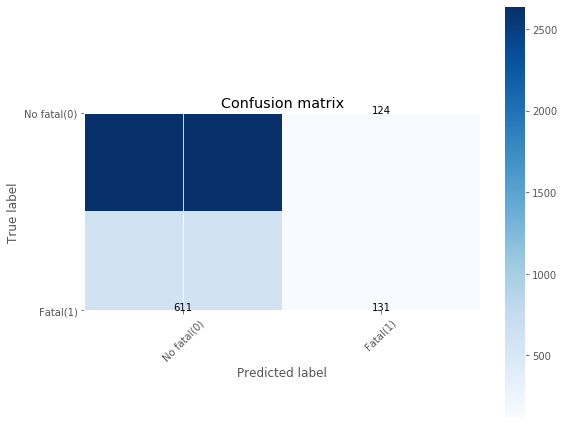

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6) )
plot_confusion_matrix(cnf_matrix, classes=['No fatal(0)','Fatal(1)'],normalize= False,  title='Confusion matrix')

## Analysis <a name="analysis"></a>

What the confusion matrix has been revealed :

1. 82% predicted cases with no fatalities 
2. 52%  predicted with fatalities 
3. F1 -score with no fatalities = 88 - good score
4. F1 -fatal accident = 26, not the best


Lets check the total ( all cases) F1 score 

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7475758138856028

Lets check Jaccard score  

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.151270207852194

In [49]:
dfr(df3, 300, 700)

Loading BokehJS ...

In [50]:
df3['cases'] = 1

In [51]:
df3.columns

Index(['StateOfOccurrence', 'FlightPhase', 'Fatalities', 'InjuryLevel',
       'TypeDesignator', 'Aircraft type', 'Engine Type', 'Engine Count', 'WTS',
       'FatalitiesN', 'cases'],
      dtype='object')

In [52]:
df_ratio = df3.groupby('StateOfOccurrence').sum()

In [53]:
df_ratio['ratio'] = round(df_ratio['FatalitiesN']/df_ratio['cases'],3)

In [54]:
df_ratio.reset_index(inplace =True)

In [55]:
df_ratio.head()

StateOfOccurrence  Fatalities  Engine Count  FatalitiesN  cases  ratio
0               ABW         5.0           5.0            2      3  0.667
1               AFG       125.0          91.0           14     39  0.359
2               AGO        31.0          30.0            5     15  0.333
3               ALB         0.0           2.0            0      1  0.000
4               AND         5.0           1.0            1      1  1.000

In [56]:
df_ratio.ratio.describe()

count    201.000000
mean       0.252542
std        0.228997
min        0.000000
25%        0.077000
50%        0.229000
75%        0.345000
max        1.000000
Name: ratio, dtype: float64

In [57]:
import folium

In [58]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'
world_geo = wget.download(url)

100% [............................................................................] 252515 / 252515

In [59]:
kl = pd.read_json(r'world_countries.json')


kl = json_normalize(kl['features'])

In [60]:
klast =kl[['id','properties.name' ]]

In [61]:
klast1 = klast.merge(df_ratio, left_on= 'id', right_on = 'StateOfOccurrence', how = 'left')

In [62]:
klast1.dropna(inplace =True)

### Fatal accident per country ratio

In [63]:
dfr(klast1, 300, 600)

Loading BokehJS ...

### Descriptive  statistics fatal accident distribution 

In [64]:


klast1.cases.describe()

count     161.000000
mean       71.490683
std       363.216931
min         1.000000
25%         4.000000
50%        13.000000
75%        41.000000
max      4503.000000
Name: cases, dtype: float64

In [65]:
#drop countries with less than 13 cases 
klast2 = klast1[klast1.cases > 13] 

### Dataframe with cases ratio

In [66]:
dfr(klast2, 300, 600)

Loading BokehJS ...

In [67]:
klast2.sort_values(by='ratio', ascending=False, axis=0, inplace=True)

In [68]:
klast2.set_index('properties.name', inplace =True)

### Top countries with highest fatal accident ratio

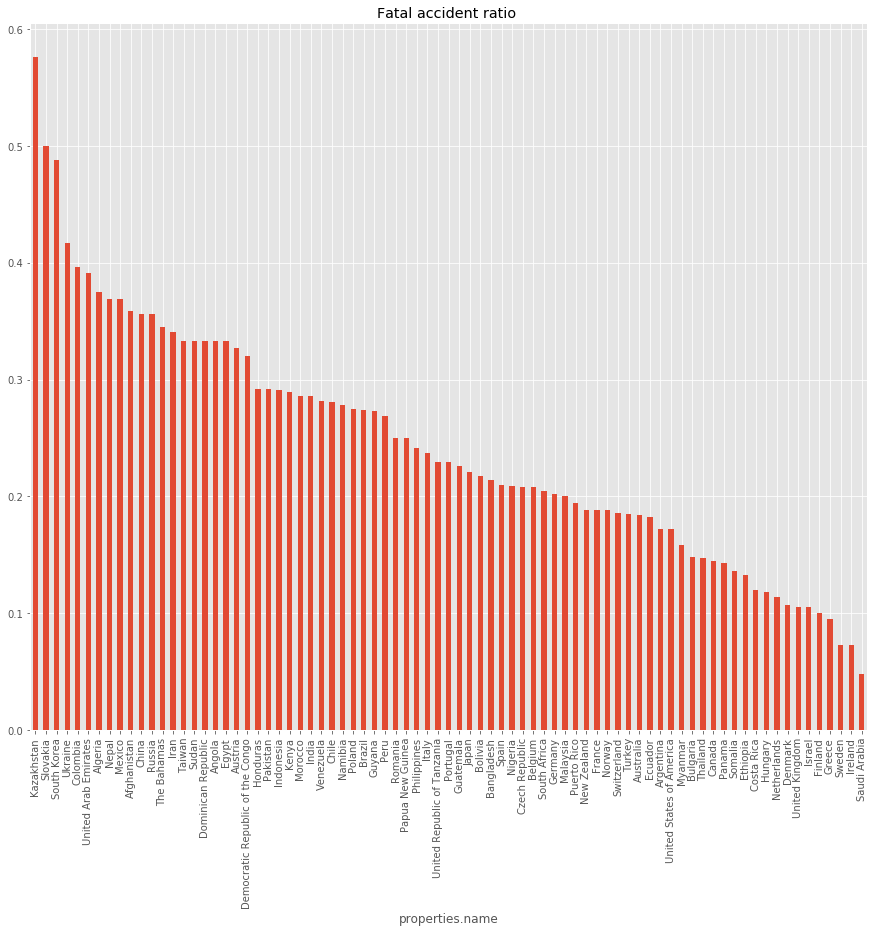

In [69]:
klast2['ratio'].plot( kind = 'bar' , figsize = (15, 13))

plt.xlabel= ('id')
plt.ylabel = ('ratio')

plt.title('Fatal accident ratio ')

#
#plt.text(2000, 6000, '2010 Earthquake')

plt.show() 

In [70]:
klast2.reset_index(inplace =True)

In [71]:
#world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

### Map, fatal accident ratio <a name="map"></a>

In [72]:
folium.Choropleth(
    geo_data=world_geo,
    data=klast2,
    columns=['properties.name', 'ratio'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    nan_fill_color='white',
    nan_fill_opacity=0.4,
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='fatalities per accident',
).add_to(world_map)
# display map
world_map

### Results and discussion  <a name="results"></a>

Fortunately Flying is the safest way to travel , especially commercial scheduled flights.

Most fatalities are recorded in general aviation and more specifically in light aircraft (under 2250 kg maximum take-off mass (MTOM)).,  about 75% fatal accidents fall on light aircraft. 
Phase of flight is also very important , because 27% of accident occur during landing and 20% during en-rout 
Most fatalities occurred in Asian countries , US and EU remain relatively safe

Fatal accidents are not easy to predict and to prevent  because not often occur and the most predictors are : aircraft wight category, country of occurs ( likely country of operation) , phase of flights. Vector Machine can be a good method  for accident prediction but because air accident is rear , the  VM method is not the best predictor of fatal cases.  